In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1 style="font-family:Times New Roman;"> <center>Linear Regression : EDA Pytorch For Beginner's</center> </h1>
<p><center style="color:#159364; font-family:Times New Roman;font-size:30px;">“Develop a passion for learning. If you do, you will never cease to grow.” – Anthony J. D’Angelo</center></p>

<div class="alert alert-block alert-info" style="font-size:30px; font-family:Times New Roman; line-height: 1.7em;">
    📌 &nbsp; Please vote up if you like this. I would like to request you to vote up and share this with fellow kaggler's </div>

## Table Of Contents
1 [Introduction](#1)

2 [Importing Libaries](#2)

3 [Importing Data Set](#3)

4 [EDA](#4)

5 [Preparing Data Set](#5)

6 [Making Mode](#6)

7 [Training](#7)

8 [Plotiing The Resuly](#8)


<h1  id="1" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 1 Introduction </h1>

<span style="font-family:Times New Roman; font-size:25px; font-weight: bold;">Linear Regression. </span>

<span style="font-family:Times New Roman; font-size:18px;">To get our feet wet, we'll start off by looking at the problem of regression. This is the task of predicting a real valued target  given a data point . In linear regression, the simplest and still perhaps the most useful approach, we assume that prediction can be expressed as a linear combination of the input features (thus giving the name linear regression): </span>

<span style="font-family:Times New Roman; font-size:18px;">A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0). </span>

<span style="font-family:Times New Roman; font-size:25px; font-weight: bold;">Mean Squared Error. </span>

<span style="font-family:Times New Roman; font-size:18px;"> Generally, we will define a loss function that says how far are our predictions from the correct answers. For the classical case of linear regression, we usually focus on the squared error. Specifically, our loss will be the sum, over all examples, of the squared error 
 on each:  </span>
 

![MSE](https://raw.githubusercontent.com/106AbdulBasit/Pytorch__Series/main/Linear%20Regression/MSE.PNG)

<h1  id="2" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 2 Importing some Libraries </h1>

In [1]:
import numpy as np
import pandas as pd 
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib

<h1  id="3" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 3 Importing Data Set </h1>

In [2]:
train = pd.read_csv('/kaggle/input/random-linear-regression/train.csv')
test = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')

#dropna Remove missing values.

train = train.dropna()
test = test.dropna()
# 
# spliting into labels and features
x_train = train.iloc[:,0].values.reshape(-1,1)
y_train = train.iloc[:,1].values.reshape(-1,1)

x_test = test.iloc[:,0].values.reshape(-1,1)
y_test = test.iloc[:,1].values.reshape(-1,1)

<h1  id="4" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 4 Explotary Data Anaylsis </h1>

In [3]:
print(train)

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[699 rows x 2 columns]


In [4]:
print(test)

      x          y
0    77  79.775152
1    21  23.177279
2    22  25.609262
3    20  17.857388
4    36  41.849864
..   ..        ...
295  71  68.545888
296  46  47.334876
297  55  54.090637
298  62  63.297171
299  47  52.459467

[300 rows x 2 columns]


In [5]:
train.head()
print(f'Shape of the train set {train.size} \n train columns {train.columns.values}')

Shape of the train set 1398 
 train columns ['x' 'y']


In [6]:
test.head()
print(f'Shape of the test set {test.size} \n train columns {test.columns.values}')

Shape of the test set 600 
 train columns ['x' 'y']


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
x,699.0,50.014306,28.954560,0.000000,25.000000,49.00000,75.000000,100.000000
y,699.0,49.939869,29.109217,-3.839981,24.929968,48.97302,74.929911,108.871618


In [8]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
x,300.0,50.936667,28.504286,0.000000,27.000000,53.000000,73.000000,100.000000
y,300.0,51.205051,29.071481,-3.467884,25.676502,52.170557,74.303007,105.591837


<h1  id="5" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 5 Peparing Data set </h1>



<span style="font-family:Times New Roman; font-size:18px;">In Numpy, you may have an array that has three dimensions, right? That is, technically speaking, a tensor. </span>


<span style="font-family:Times New Roman; font-size:18px;">
A scalar (a single number) has zero dimensions, a vector has one dimension, a matrix has two dimensions and a tensor has three or more dimensions. That’s it!. </span>



<span style="font-family:Times New Roman; font-size:18px;"> But, to keep things simple, it is commonplace to call vectors and matrices tensors as well — so, from now on, everything is either a scalar or a tensor. </span>




![tensor](https://raw.githubusercontent.com/106AbdulBasit/Pytorch__Series/main/Linear%20Regression/Tensors.PNG)

In [9]:
# random generated
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

x_test_tensor = torch.from_numpy(x_test).float()
y_test_tensor = torch.from_numpy(y_test).float()


from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader


dataset_train = TensorDataset(x_train_tensor, y_train_tensor)
dataset_test = TensorDataset(x_test_tensor, y_test_tensor)

# how assign
train_loader = DataLoader(dataset=dataset_train, batch_size=50)
test_loader = DataLoader(dataset=dataset_test, batch_size=60)

<h1  id="6" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> 6 Making The Model </h1>
           


<span style="font-family:Times New Roman; font-size:18px;">This is generic model Function. If you want to change the optimizer or lossfunction or model you can  just  pass those function name to this generic function. </span>

In [14]:
def make_train_step(model, loss_fn, optimizer):
    # builds & returns the function that will be called inside the loop
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(y, yhat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

<h4   style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Loss and Optimizer </h4>



<span style="font-family:Times New Roman; font-size:18px;"> Train a model means making it better and better over the course of a period of training. But in order for this goal to make any sense at all, we first need to define what better means in the first place. In this case, we'll use the MSE between our prediction and the true value. Instead of writing our own loss function we’re just going to access squared error by instantiating nn.MESLoss. </span>





<span style="font-family:Times New Roman; font-size:18px;"> It turns out that linear regression actually has a closed-form solution. However, most interesting models that we'll care about cannot be solved analytically. So we'll solve this problem by stochastic gradient descent. At each step, we'll estimate the gradient of the loss with respect to our weights, using one batch randomly drawn from our dataset. Then, we'll update our parameters a small amount in the direction that reduces the loss. The size of the step is determined by the learning rate lr. </span>




In [13]:


device = 'cpu'

# hyperparameters
lr = 1e-6
n_epochs = 1000

from sklearn.metrics import r2_score

# loss function & optimizer
model = nn.Sequential(nn.Linear(1, 1)).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

<h1  id="7" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px">  7 Training and Evaluation </h1>

Now that we have all the pieces, we just need to wire them together by writing a training loop. First we'll define epochs, the number of passes to make over the dataset. Then for each pass, we'll iterate through train_data, grabbing batches of examples and their corresponding labels.

For each batch, we'll go through the following ritual:

Generate predictions (yhat) and the loss (loss) by executing a forward pass through the network.
Calculate gradients by making a backwards pass through the network (loss.backward()).
Update the model parameters by invoking our SGD optimizer, use optimizer.step().

In [15]:

# training step
train_step = make_train_step(model, loss_fn, optimizer)
training_losses = []
test_losses = []
accuracies = []
for epoch in range(n_epochs):
    batch_losses = []
    for nbatch, (x_batch, y_batch) in enumerate(train_loader):
        #print(nbatch)
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        loss = train_step(x_batch, y_batch)
        batch_losses.append(loss)
    training_loss = np.mean(batch_losses)
    training_losses.append(training_loss)
    # 
    ## here evaluation 
    with torch.no_grad():
        # batches for test
        val_losses = []
        accs = []
        for x_test, y_test in test_loader:
            x_test = x_test.to(device)
            y_test = y_test.to(device)
            # 
            model.eval()
            yhat = model(x_test)
            test_loss = loss_fn(y_test, yhat)
            test_losses.append(test_loss)
            acc = r2_score(y_test, yhat)
            accs.append(acc)
        test_loss = np.mean(test_losses)
        test_losses.append(test_loss)
        acc_batch = np.mean(accs)
        accuracies.append(acc_batch)
    if epoch % 50 == 0:
        print(f'epoch {epoch+1} | Training loss: {training_loss:.4f} | Test loss: {test_loss:.4f} | R2 {acc_batch:.4f}')

epoch 1 | Training loss: 587.7354 | Test loss: 565.9374 | R2 0.3216
epoch 51 | Training loss: 8.0148 | Test loss: 98.2308 | R2 0.9880
epoch 101 | Training loss: 7.9679 | Test loss: 59.7520 | R2 0.9883
epoch 151 | Training loss: 7.9679 | Test loss: 45.4711 | R2 0.9883
epoch 201 | Training loss: 7.9678 | Test loss: 37.8665 | R2 0.9883
epoch 251 | Training loss: 7.9677 | Test loss: 33.0928 | R2 0.9883
epoch 301 | Training loss: 7.9677 | Test loss: 29.7956 | R2 0.9883
epoch 351 | Training loss: 7.9676 | Test loss: 27.3709 | R2 0.9883
epoch 401 | Training loss: 7.9675 | Test loss: 25.5068 | R2 0.9883
epoch 451 | Training loss: 7.9675 | Test loss: 24.0254 | R2 0.9883
epoch 501 | Training loss: 7.9674 | Test loss: 22.8174 | R2 0.9883
epoch 551 | Training loss: 7.9673 | Test loss: 21.8121 | R2 0.9883
epoch 601 | Training loss: 7.9673 | Test loss: 20.9612 | R2 0.9883
epoch 651 | Training loss: 7.9672 | Test loss: 20.2309 | R2 0.9883
epoch 701 | Training loss: 7.9671 | Test loss: 19.5968 | R2 0.

<h1  id="8" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> Plotting the Result </h1>

OrderedDict([('0.weight', tensor([[0.9914]])), ('0.bias', tensor([0.5161]))])


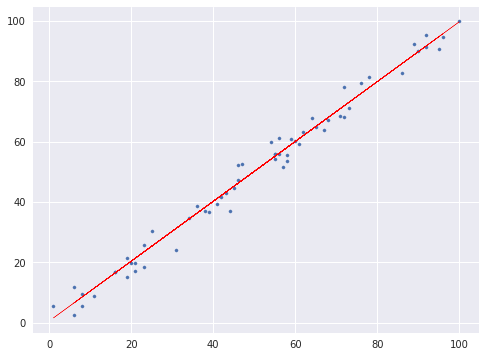

In [16]:
print(model.state_dict())
plt.style.use('seaborn')
plt.figure(figsize=(8,6)) 
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test,model(x_test).detach().numpy(), 'r', linewidth=0.4)



<span style="font-family:Times New Roman; font-size:18px;">For Reference  check the below link </span>
[Understanding Pytorch](https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e#3a3f)

<h1  id="9" style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#FFFFFF;
           font-size:350%;
           font-family:Times New Roman;
           letter-spacing:0.5px"> What's Next </h1>
   


<span style="font-family:Times New Roman; font-size:18px;"> Convolutional Neural Network Basic in Tensor Flow Dog vs cat. </span>

[Kaggle Link](https://www.kaggle.com/code/abdulbasitniazi/vs-how-cnn-works-eda)

<span style="font-family:Times New Roman; font-size:18px;">Brain Tumor Classification Using Transer Learning Tensor Flow. </span>

[Kaggle Link](https://www.kaggle.com/code/abdulbasitniazi/resnet50-eda-transfer-learning)

<span style="font-family:Times New Roman; font-size:18px;">Efficeint Net Fine Tuning </span>

[Kaggle Link](https://www.kaggle.com/code/abdulbasitniazi/enetb7-explained-98-fine-tuning-eda)

<span style="font-family:Times New Roman; font-size:18px;">ResNet 50 From Scratch Tensor Flow. </span>

[Kaggle Link](https://www.kaggle.com/code/abdulbasitniazi/resnet50fromscratch-eda)



<span style="font-family:Times New Roman; font-size:18px;">Making Note Book Beautiful </span>

[Kaggle Link](https://www.kaggle.com/code/abdulbasitniazi/making-notebook-beautiful)


<span style="font-family:Times New Roman; font-size:18px;">Video Explanation </span>
[Youtube Link](https://www.youtube.com/channel/UCSAw-QDHdXjrAMpg7-TELVA)

